# Evaluation of the results from the human surveys

10 items for 5 people = GROUP A

10 items for 5 people = GROUP B

10 items for 5 people = GROUP C

30 items by 15 people = 5 analogies per item = 150 analogies 

In [1]:
# imports
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import collections


## Evaluate Meta Data

In [2]:
# load data files
path = '../../data/human_results/'
file_name = 'EXP_% - Research Study on Analogies (Responses) - Form Responses 1.csv'

counter = 1
meta_data = {}
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = line.split(',')
            age = int(line[4])
            gender = line[5]
            region = line[3]
            meta_data[counter] = [age, gender, region]
            counter += 1

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [8]:
# Calculate average age
ages = [entry[0] for entry in meta_data.values()]
average_age = sum(ages) / len(ages)
print(f"Average Age: {average_age:.2f}")

genders = [entry[1] for entry in meta_data.values()]
gender_counts = Counter(genders)
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} participant(s)")

# Regional distribution
regions = [entry[2] for entry in meta_data.values()]
region_counts = Counter(regions)
print("Regional Distribution:")
for region, count in region_counts.items():
    print(f"{region}: {count} participant(s)")

Average Age: 35.54
Gender Distribution:
Male: 14 participant(s)
Female: 8 participant(s)
Other: 1 participant(s)
Prefer not to say: 1 participant(s)
Regional Distribution:
Europe: 13 participant(s)
North America: 6 participant(s)
Africa: 1 participant(s)
Asia/Pacific: 3 participant(s)
Prefer not to say: 1 participant(s)


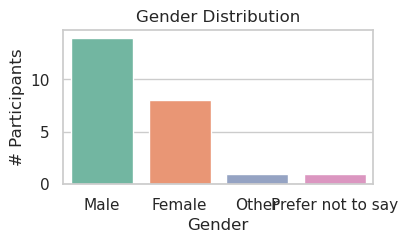

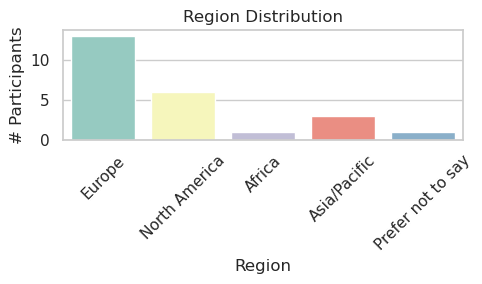

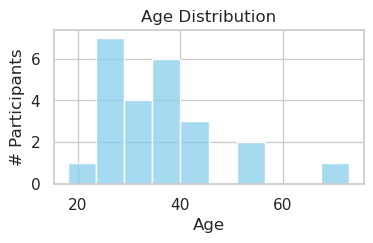

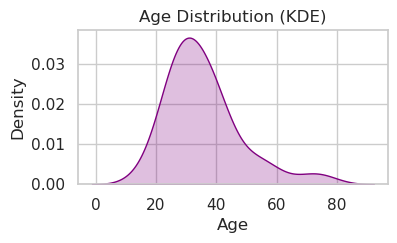

In [4]:
# Extract data
ages = [entry[0] for entry in meta_data.values()]
genders = [entry[1] for entry in meta_data.values()]
regions = [entry[2] for entry in meta_data.values()]

# Set the style
sns.set(style='whitegrid')

# Plot Gender Distribution
plt.figure(figsize=(4, 2))
sns.countplot(x=genders, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('# Participants')
plt.show()

# Plot Region Distribution
plt.figure(figsize=(5, 3))
sns.countplot(x=regions, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('# Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Age Distribution - Histogram
plt.figure(figsize=(4, 2))
sns.histplot(ages, bins=10, color='skyblue', kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('# Participants')
plt.show()

# Plot Age Distribution - KDE
plt.figure(figsize=(4, 2))
sns.kdeplot(ages, fill=True, color='purple')
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Evaluate Item Data

In [5]:
data_a = {
    "wanted": [[],[]],
    "pulled": [[],[]],
    "increased": [[],[]],
    "impacted": [[],[]],
    "respected": [[],[]],
    "pushed": [[],[]],
    "lifted": [[],[]],
    "owned": [[],[]],
    "argued with": [[],[]],
    "walked": [[],[]]
}

data_b = {
    "fled": [[],[]],
    "pointed at": [[],[]],
    "succeeded": [[],[]],
    "hunted": [[],[]],
    "warned": [[],[]],
    "smashed": [[],[]],
    "perched": [[],[]],
    "bombed": [[],[]],
    "hoped": [[],[]],
    "gave to": [[],[]]
}

data_c = {
    "showed": [[],[]],
    "floated": [[],[]],
    "flew": [[],[]],
    "obeyed": [[],[]],
    "rested": [[],[]],
    "rushed": [[],[]],
    "regretted": [[],[]],
    "sank": [[],[]],
    "offended": [[],[]],
    "tempted": [[],[]]
}

def split_preserve_sentences(line):
    return next(csv.reader([line], skipinitialspace=True))

# load data files
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = split_preserve_sentences(line)
            
            if cond == "A":
                incr = 0
                for key in data_a.keys():
                    pos = 7 + incr
                    data_a[key][0].append(line[pos])
                    data_a[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "B":
                incr = 0
                for key in data_b.keys():
                    pos = 7 + incr
                    data_b[key][0].append(line[pos])
                    data_b[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "C":
                incr = 0
                for key in data_c.keys():
                    pos = 7 + incr
                    data_c[key][0].append(line[pos])
                    data_c[key][1].append(line[pos-1])
                    incr += 2
           

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [6]:
data = {**data_a, **data_b, **data_c}
print(data.keys())
print(len(data.keys()))

dict_keys(['wanted', 'pulled', 'increased', 'impacted', 'respected', 'pushed', 'lifted', 'owned', 'argued with', 'walked', 'fled', 'pointed at', 'succeeded', 'hunted', 'warned', 'smashed', 'perched', 'bombed', 'hoped', 'gave to', 'showed', 'floated', 'flew', 'obeyed', 'rested', 'rushed', 'regretted', 'sank', 'offended', 'tempted'])
30


In [7]:
overall_counts = collections.Counter()
item_distributions = []
agreement_percentages = []

# Define possible choices
choices = ['A', 'B', 'C', 'D']

# Iterate over each item in data_a
for item_name, lists in data.items():
    choices_list = lists[0]
    item_counts = collections.Counter(choices_list)
    overall_counts.update(choices_list)
    total_responses = len(choices_list)
    most_common_choice, most_common_count = item_counts.most_common(1)[0]
    agreement_percentage = (most_common_count / total_responses) * 100

    agreement_percentages.append({
        'Item': item_name,
        'Most Common Choice': most_common_choice,
        'Agreement Percentage (%)': agreement_percentage
    })
    

    distribution_data = {'Item': item_name}
    for choice in choices:
        distribution_data[choice] = item_counts.get(choice, 0)
    item_distributions.append(distribution_data)

distribution_df = pd.DataFrame(item_distributions).set_index('Item')
agreement_df = pd.DataFrame(agreement_percentages).set_index('Item')

total_responses = sum(overall_counts.values())
overall_distribution = {choice: overall_counts.get(choice, 0) for choice in choices}
overall_distribution_percentages = {choice: (count / total_responses) * 100 for choice, count in overall_distribution.items()}

overall_distribution_df = pd.DataFrame.from_dict(overall_distribution, orient='index', columns=['Count'])
overall_distribution_df['Percentage (%)'] = (overall_distribution_df['Count'] / total_responses) * 100

print("Distribution of Answers for Each Item:")
display(distribution_df)

print("\nOverall Distribution of Answers:")
display(overall_distribution_df)

print("\nAgreement Analysis Per Item:")
display(agreement_df)

Distribution of Answers for Each Item:


,A,B,C,D
Item,,,,
wanted,8,0,0,0
pulled,0,8,0,0
increased,0,0,8,0
impacted,6,0,0,2
respected,2,3,2,1
pushed,8,0,0,0
lifted,0,0,7,1
owned,1,5,0,2
argued with,6,1,0,1



Overall Distribution of Answers:


,Count,Percentage (%)
A,87,36.25
B,45,18.75
C,48,20.00
D,60,25.00



Agreement Analysis Per Item:


,Most Common Choice,Agreement Percentage (%)
Item,,
wanted,A,100.0
pulled,B,100.0
increased,C,100.0
impacted,A,75.0
respected,B,37.5
pushed,A,100.0
lifted,C,87.5
owned,B,62.5
argued with,A,75.0
